Dataset: https://archive.ics.uci.edu/dataset/222/bank+marketing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EXPLARATORY DATA ANALYSIS and PRE-PROCESSING


In [2]:
# Train data
train_df = pd.read_csv("data/bank-data.csv", sep=';')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
train_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
train_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39529,48,management,single,tertiary,no,5689,no,no,cellular,26,may,527,2,103,1,success,no
40093,31,management,single,tertiary,no,617,no,no,cellular,4,jun,1161,1,97,2,success,yes
30779,27,technician,married,tertiary,no,13,yes,no,telephone,6,feb,24,5,-1,0,unknown,no
22558,47,services,married,secondary,no,2322,no,no,cellular,22,aug,618,1,-1,0,unknown,no
40524,79,retired,married,primary,no,429,no,no,telephone,8,jul,1006,2,-1,0,unknown,yes
28173,46,blue-collar,married,secondary,no,521,yes,no,cellular,29,jan,246,1,226,3,failure,no
22995,32,technician,single,secondary,no,0,no,no,cellular,26,aug,181,2,-1,0,unknown,no
26230,34,entrepreneur,married,secondary,no,3119,yes,no,cellular,20,nov,505,1,183,4,failure,no
30535,39,technician,single,secondary,no,0,yes,yes,cellular,5,feb,95,4,-1,0,unknown,no
45143,28,student,single,secondary,no,970,no,no,cellular,8,nov,137,1,96,1,failure,no


### Age Distribution

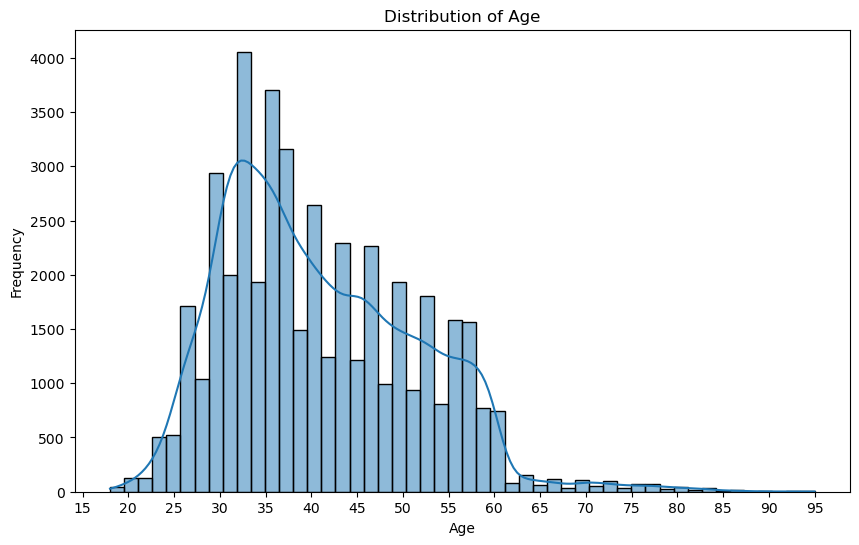

In [6]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
ax = sns.histplot(train_df['age'], bins=50, kde=True)

# Add labels and title
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks([i for i in range(15, 100, 5)])

# Show the plot
plt.show()

- The age group that appears most frequently is between 30 and 47 years old.








### Job Categories
The job or employment status of the customer.

In [7]:
train_df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

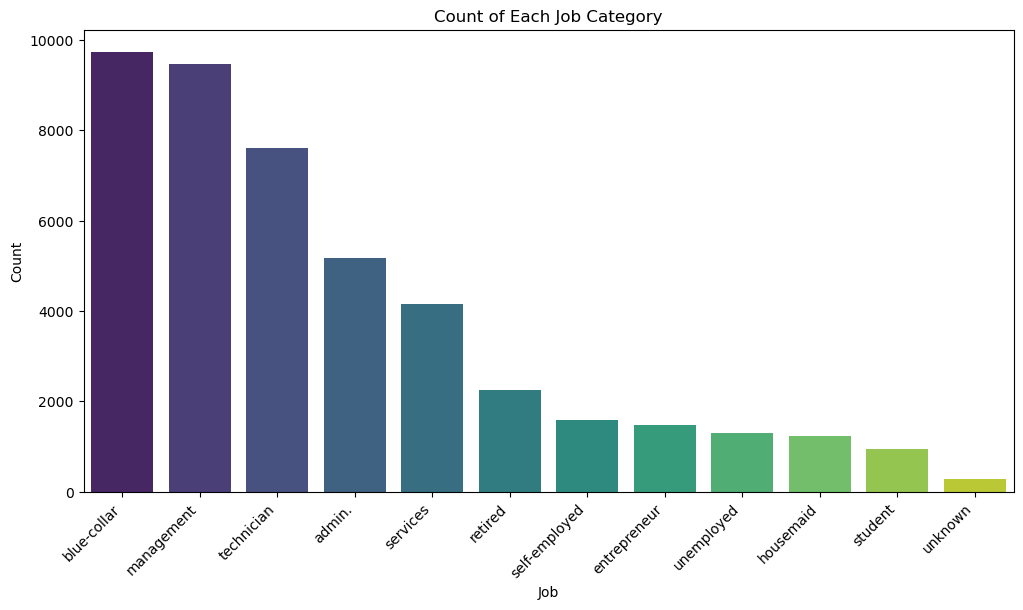

In [8]:
# Define counts
job_counts = train_df['job'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=job_counts.index, y=job_counts.values,palette='viridis')

# Add labels and title
plt.title('Count of Each Job Category')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [9]:
# Dropping 'unknown'
train_df = train_df[train_df['job'] != 'unknown']

In [10]:
train_df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64

### Marital Status

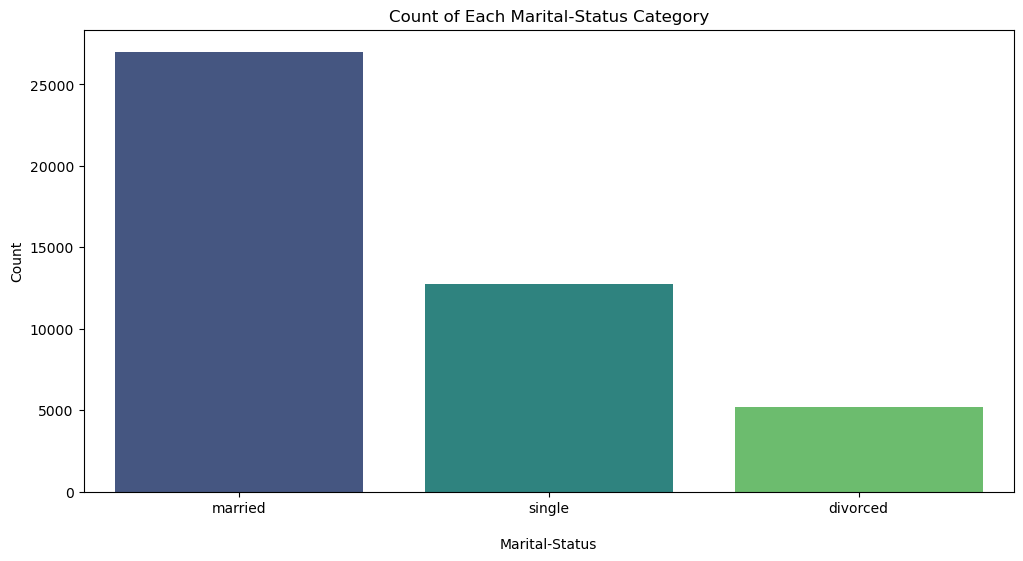

In [11]:
# Define counts
marital_counts = train_df['marital'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=marital_counts.index, y=marital_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Marital-Status Category')
plt.xlabel('\nMarital-Status')
plt.ylabel('Count')

# Show the plot
plt.show()

### Education Status

In [12]:
train_df['education'] = train_df['education'].replace('unknown', 'others')

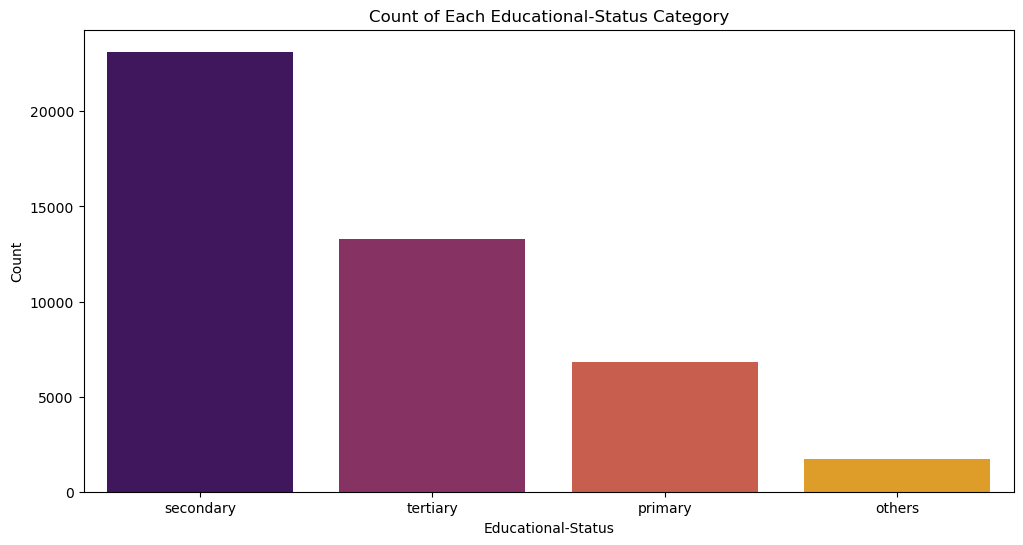

In [13]:
# Define Counts
education_counts = train_df['education'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=education_counts.index, y=education_counts.values,palette = "inferno" )

# Add labels and title
plt.title('Count of Each Educational-Status Category')
plt.xlabel('Educational-Status')
plt.ylabel('Count')

# Show the plot
plt.show()

### Default Status
Has the customer previously paid his credit loans on time?

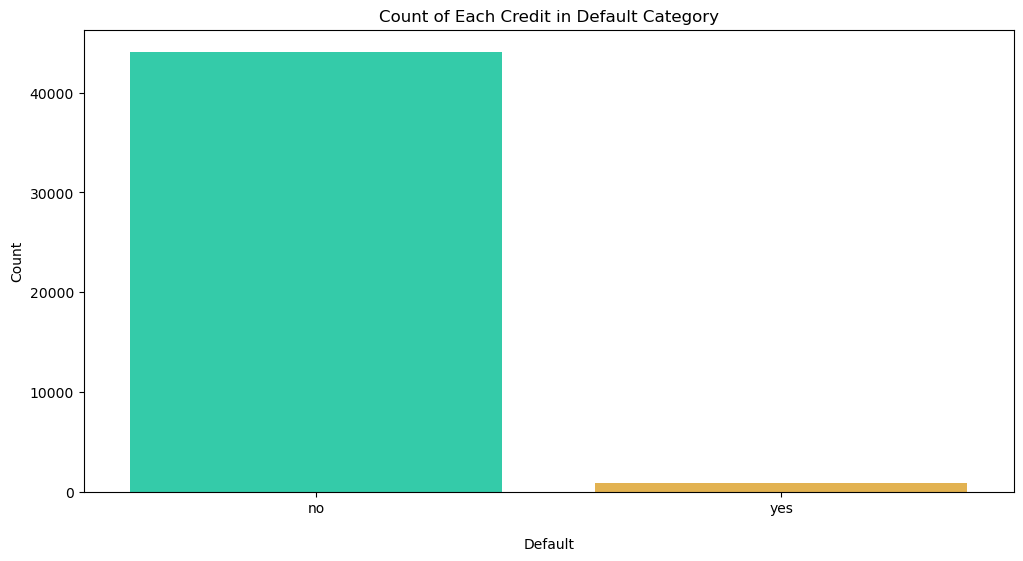

In [14]:
# Define counts
default_counts = train_df['default'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=default_counts.index, y=default_counts.values, palette='turbo')

# Add labels and title
plt.title('Count of Each Credit in Default Category')
plt.xlabel('\nDefault')
plt.ylabel('Count')

# Show the plot
plt.show()

In [15]:
# Since the 'default' column is meaningless to include, we will drop it.
train_df.drop(columns=['default'], inplace=True)

### Balance of Customers

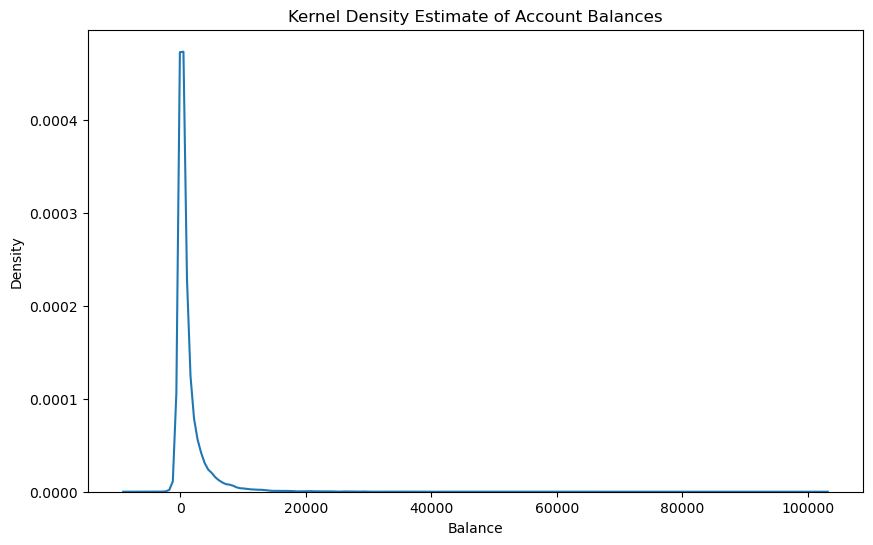

In [16]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.kdeplot(train_df['balance'])

# Add labels and title
plt.title('Kernel Density Estimate of Account Balances')
plt.xlabel('Balance')
plt.ylabel('Density')

# Show the plot
plt.show()

In [17]:
#Check for values under zero
train_df[train_df['balance'] <= 0]['balance'].count()

7248

In [18]:
# Define the percentile threshold
percentile_threshold = 95

# Calculate the specified percentile
percentile_value = int(np.percentile(train_df['balance'], percentile_threshold))

# Identify potential outliers
outliers = train_df[train_df['balance'] > percentile_value]

print(f'{percentile_threshold}th Percentile Value: {percentile_value}')
print(f'Number of Potential Outliers: {len(outliers)}')

95th Percentile Value: 5763
Number of Potential Outliers: 2246


In [19]:
### The maximum value of 102127 is considerably higher than the 95th percentile (5768).
### I'll drop the values that above 5768.

train_df = train_df[train_df['balance'] <= 5768]

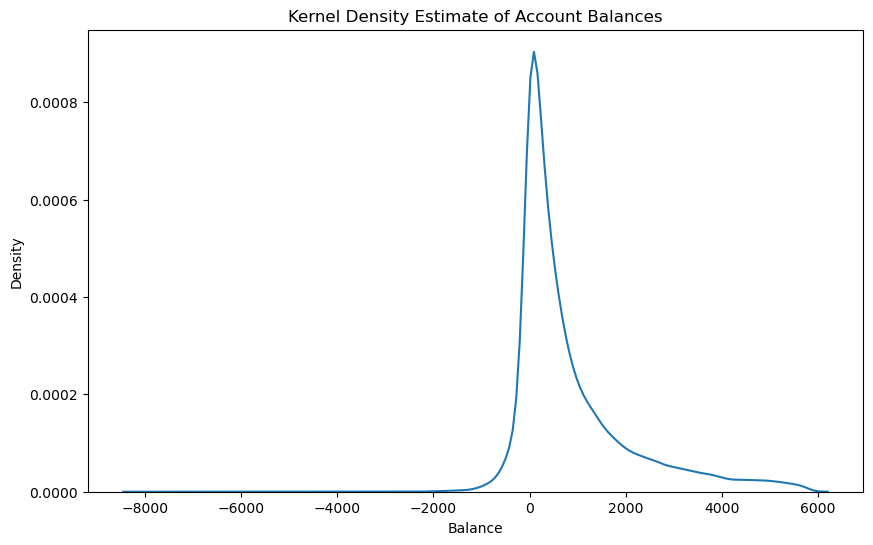

In [20]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.kdeplot(train_df['balance'])

# Add labels and title
plt.title('Kernel Density Estimate of Account Balances')
plt.xlabel('Balance')
plt.ylabel('Density')

# Show the plot
plt.show()

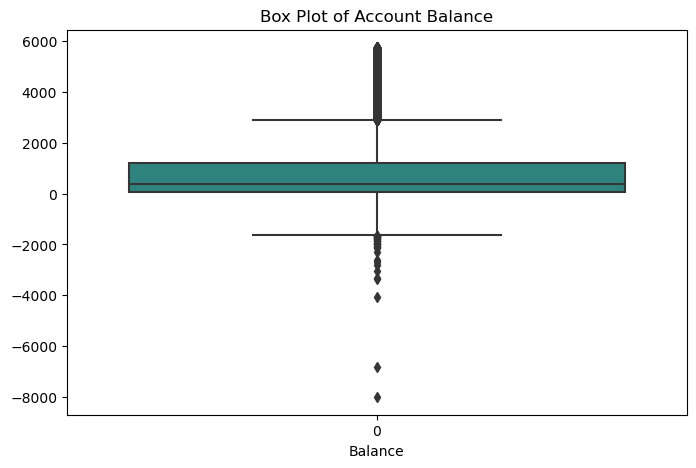

In [21]:
# Define figure size
plt.figure(figsize=(8, 5))

# Plot the boxplot
sns.boxplot(train_df['balance'], palette = 'viridis')

# Add labels and title
plt.title('Box Plot of Account Balance')
plt.xlabel('Balance')

# Show the plot
plt.show()

In [22]:
#Define the percentile threshold for outliers - 5%
# Define the percentile threshold
percentile_threshold = 5

# Calculate the specified percentile
percentile_value = int(np.percentile(train_df['balance'], percentile_threshold))

# Identify potential outliers
outliers = train_df[train_df['balance'] < percentile_value]

print(f'{percentile_threshold}th Percentile Value: {percentile_value}')
print(f'Number of Potential Outliers: {len(outliers)}')

5th Percentile Value: -192
Number of Potential Outliers: 2133


In [23]:
### The minimum value of -8019 is considerably lower than the 5th percentile (-191).
### I'll drop the values that under -191.

train_df = train_df[train_df['balance'] > -191]

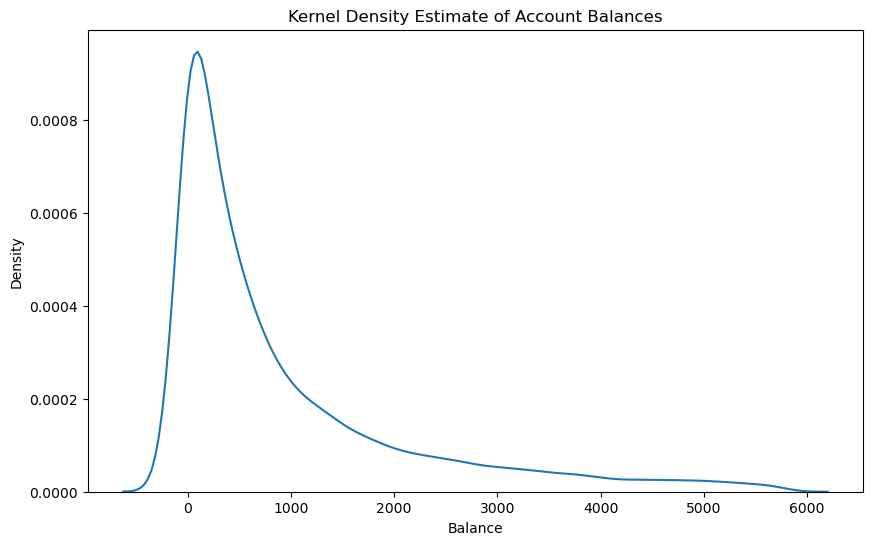

In [24]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.kdeplot(train_df['balance'])

# Add labels and title
plt.title('Kernel Density Estimate of Account Balances')
plt.xlabel('Balance')
plt.ylabel('Density')

# Show the plot
plt.show()

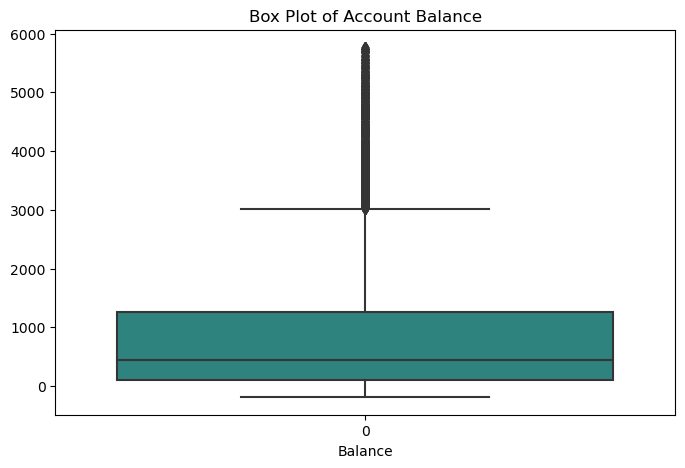

In [25]:
# Define figure size
plt.figure(figsize=(8, 5))

# Plot the boxplot
sns.boxplot(train_df['balance'], palette='viridis')

# Add labels and title
plt.title('Box Plot of Account Balance')
plt.xlabel('Balance')

# Show the plot
plt.show()


### Housing Loan Feature
Whether the customer has a housing loan or not.

In [26]:
train_df['housing'].value_counts()

housing
yes    22425
no     18110
Name: count, dtype: int64

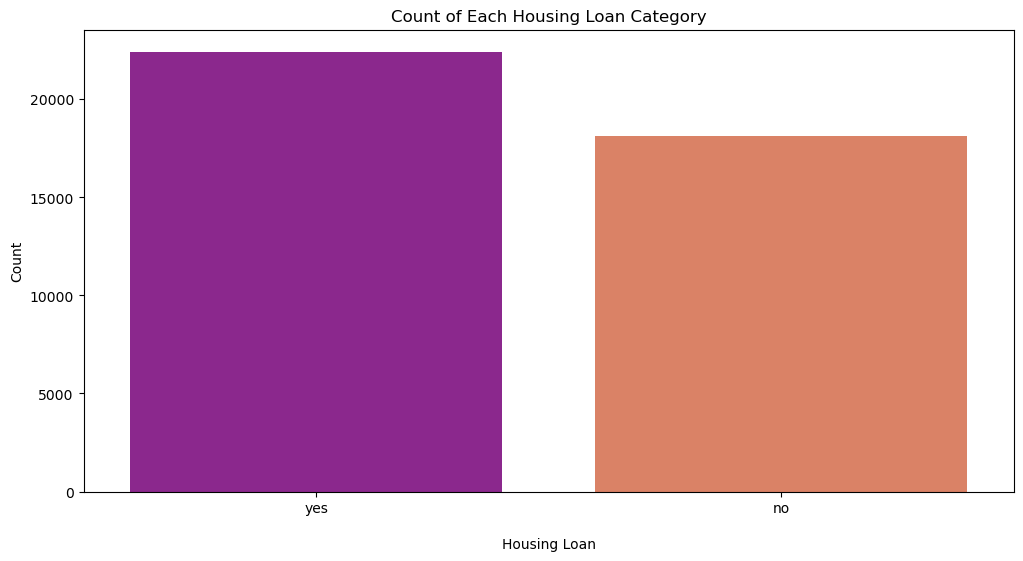

In [27]:
# Define counts
housing_counts = train_df['housing'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=housing_counts.index, y=housing_counts.values, palette='plasma')

# Add labels and title
plt.title('Count of Each Housing Loan Category')
plt.xlabel('\nHousing Loan')
plt.ylabel('Count')

# Show the plot
plt.show()


### LOAN FEATURE
Whether the customer has a loan or not.

In [28]:
train_df['loan'].value_counts()

loan
no     34200
yes     6335
Name: count, dtype: int64

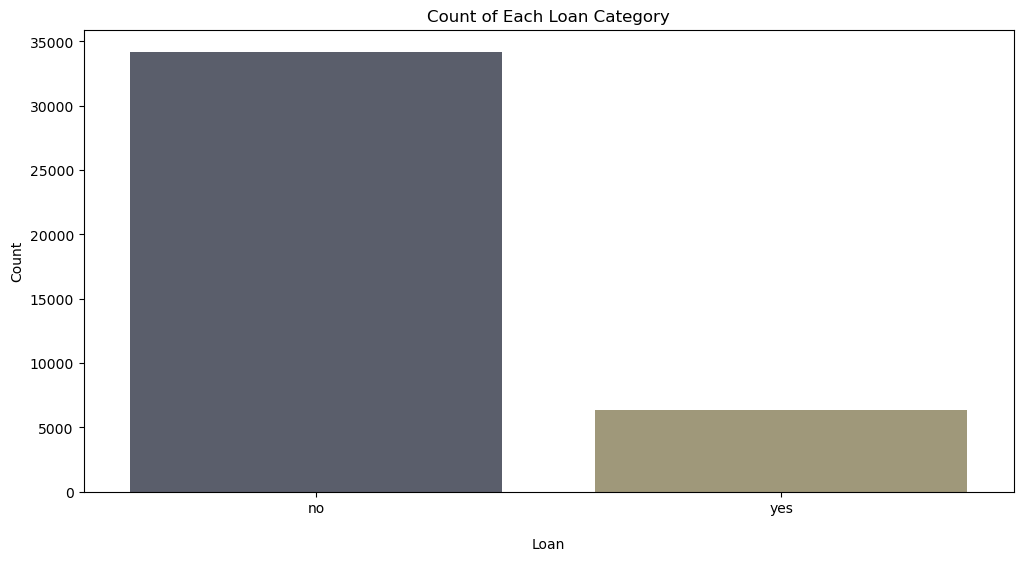

In [29]:
# Define counts
loan_counts = train_df['loan'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=loan_counts.index, y=loan_counts.values, palette='cividis')

# Add labels and title
plt.title('Count of Each Loan Category')
plt.xlabel('\nLoan')
plt.ylabel('Count')

# Show the plot
plt.show()

### Contact Feature
Type of communication used to contact customers

In [30]:
train_df['contact'].value_counts()

contact
cellular     26412
unknown      11521
telephone     2602
Name: count, dtype: int64

In [31]:
train_df['contact'] = train_df['contact'].replace('unknown', 'others')
train_df['contact'].value_counts()

contact
cellular     26412
others       11521
telephone     2602
Name: count, dtype: int64

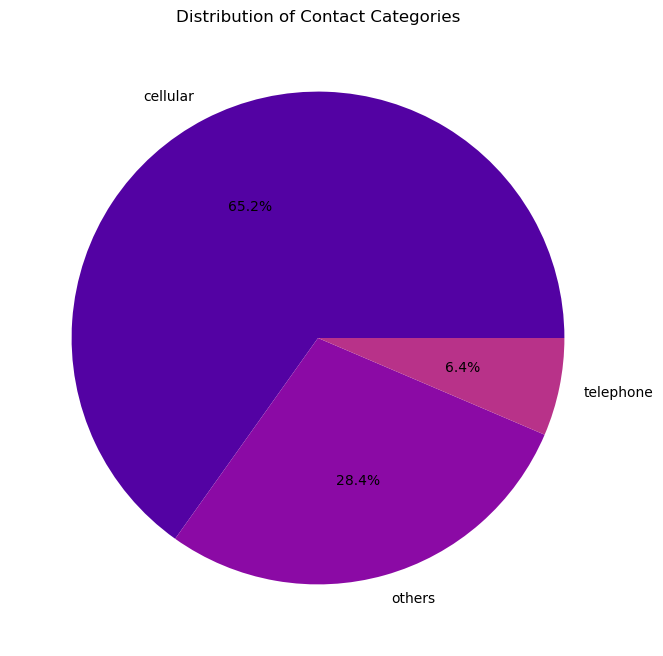

In [32]:
# Define counts
contact_counts = train_df['contact'].value_counts()

# Define figure size
plt.figure(figsize=(8, 8))  # Adjust the figure size to make it a square for a pie chart

# Create a pie chart
plt.pie(contact_counts, labels=contact_counts.index, autopct='%1.1f%%', colors=sns.color_palette('plasma'))

# Add a title
plt.title('Distribution of Contact Categories')

# Show the plot
plt.show()

### Day Feature
Day of the month when customers were last contacted

In [33]:
train_df['day'].value_counts()

day
20    2404
18    2048
17    1783
21    1752
5     1751
6     1745
8     1695
14    1659
7     1637
28    1634
29    1586
19    1532
15    1530
12    1459
13    1441
30    1416
9     1415
11    1320
4     1309
16    1304
2     1168
27     955
3      954
26     883
22     827
23     816
25     763
31     571
10     472
24     417
1      289
Name: count, dtype: int64

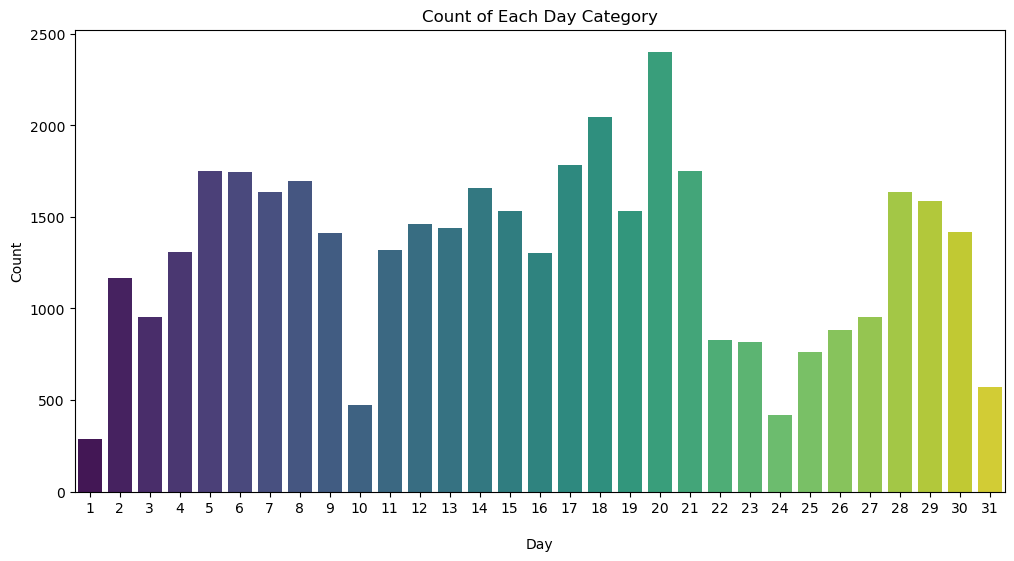

In [34]:
# Define counts
day_counts = train_df['day'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Day Category')
plt.xlabel('\nDay')
plt.ylabel('Count')

# Show the plot
plt.show()

### Month Feature
last contact month of year.

In [35]:
train_df['month'].value_counts()

month
may    12282
jul     6202
aug     5707
jun     4709
nov     3374
apr     2704
feb     2443
jan     1308
oct      659
sep      524
mar      427
dec      196
Name: count, dtype: int64

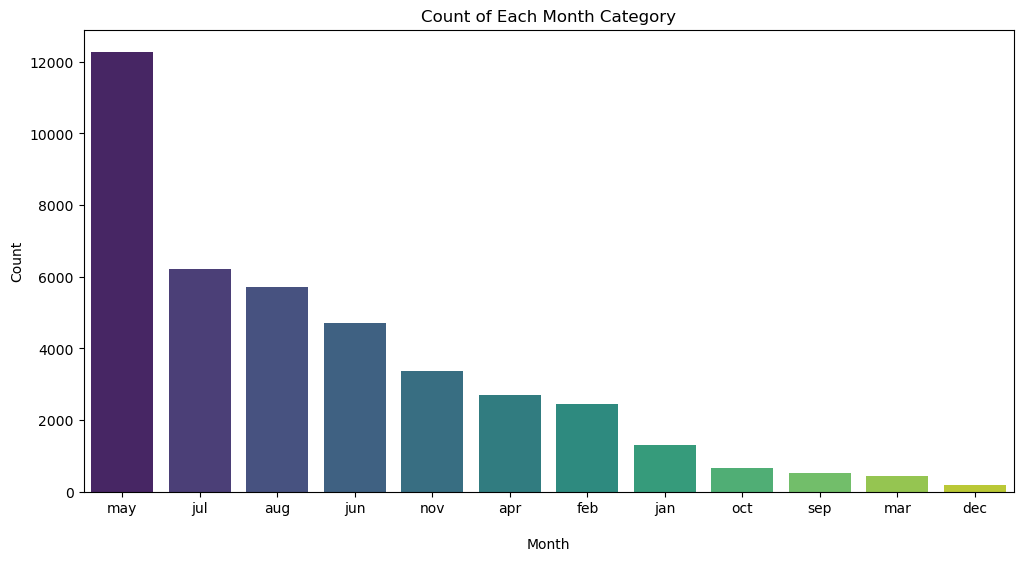

In [36]:
# Define counts
month_counts = train_df['month'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Month Category')
plt.xlabel('\nMonth')
plt.ylabel('Count')

# Show the plot
plt.show()

### Duration Feature **
Last contact duration, in seconds

In [37]:
train_df['duration'].describe()

count    40535.000000
mean       257.749106
std        257.443357
min          0.000000
25%        103.000000
50%        180.000000
75%        318.500000
max       3881.000000
Name: duration, dtype: float64

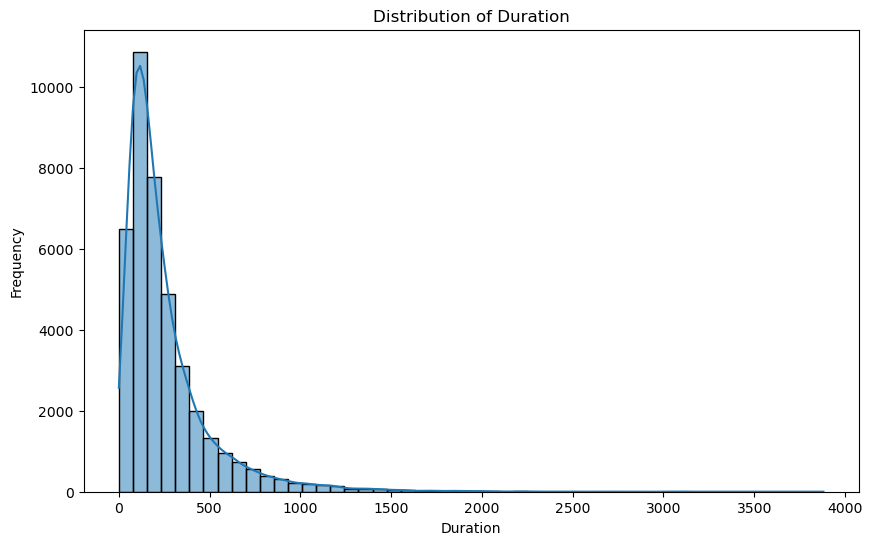

In [38]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
ax = sns.histplot(train_df['duration'], bins=50, kde=True)

# Add labels and title
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
# plt.xticks([i for i in range(15, 100, 5)])


# Show the plot
plt.show()

### Campaign Feature
Number of contacts performed during this campaign and for this client

In [39]:
train_df['campaign'].describe()

count    40535.000000
mean         2.756457
std          3.072638
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: campaign, dtype: float64

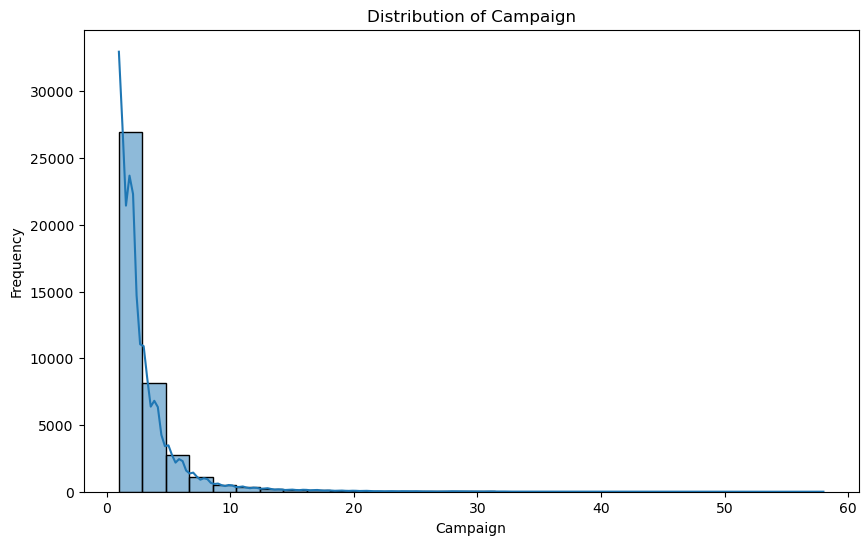

In [40]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
ax = sns.histplot(train_df['campaign'], bins=30, kde=True)

# Add labels and title
plt.title('Distribution of Campaign')
plt.xlabel('Campaign')
plt.ylabel('Frequency')
# plt.xticks([i for i in range(15, 100, 5)])


# Show the plot
plt.show()

### Passed Days
Number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted)


In [41]:
# Get the values that is not -1
filtered_data = train_df[train_df['pdays'] != -1]

# Get statistical summary
filtered_data['pdays'].describe()

count    7463.000000
mean      224.626424
std       115.837664
min         1.000000
25%       132.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

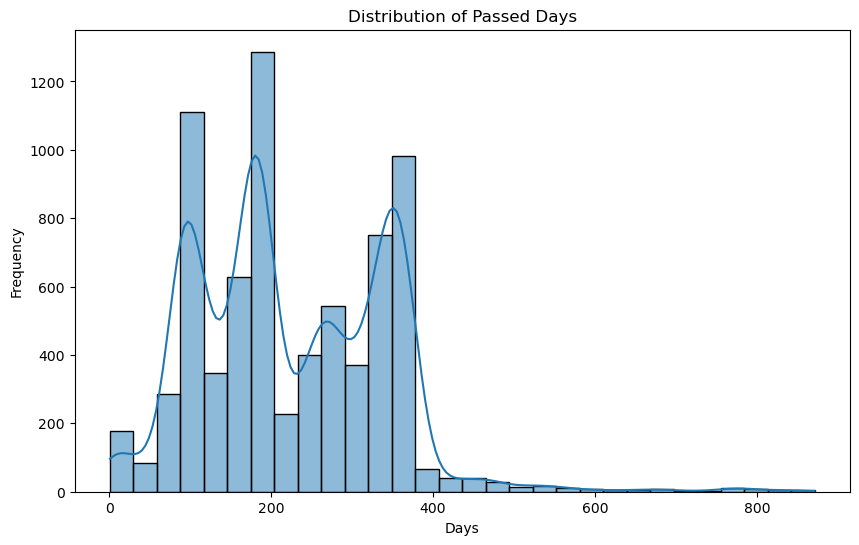

In [42]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
ax = sns.histplot(filtered_data['pdays'], bins=30, kde=True)

# Add labels and title
plt.title('Distribution of Passed Days')
plt.xlabel('Days')
plt.ylabel('Frequency')
# plt.xticks([i for i in range(15, 100, 5)])


# Show the plot
plt.show()

### Previous Contacts
Number of contacts performed before this campaign and for this client.

In [43]:
train_df['previous'].value_counts()

previous
0      33072
1       2513
2       1886
3       1032
4        649
5        415
6        253
7        185
8        126
9         79
10        62
11        61
12        41
13        31
14        18
15        18
17        13
16        12
19        10
20         7
23         7
22         6
24         5
27         5
18         4
21         4
29         3
25         3
38         2
37         2
30         2
51         1
275        1
26         1
58         1
28         1
32         1
40         1
55         1
41         1
Name: count, dtype: int64

In [44]:
# Since most of the values are 0, we can drop it.
train_df.drop(columns=['previous'], inplace=True)

### Previous Outcome
Outcome of the previous marketing campaign

In [45]:
train_df['poutcome'].value_counts()

poutcome
unknown    33077
failure     4387
other       1676
success     1395
Name: count, dtype: int64

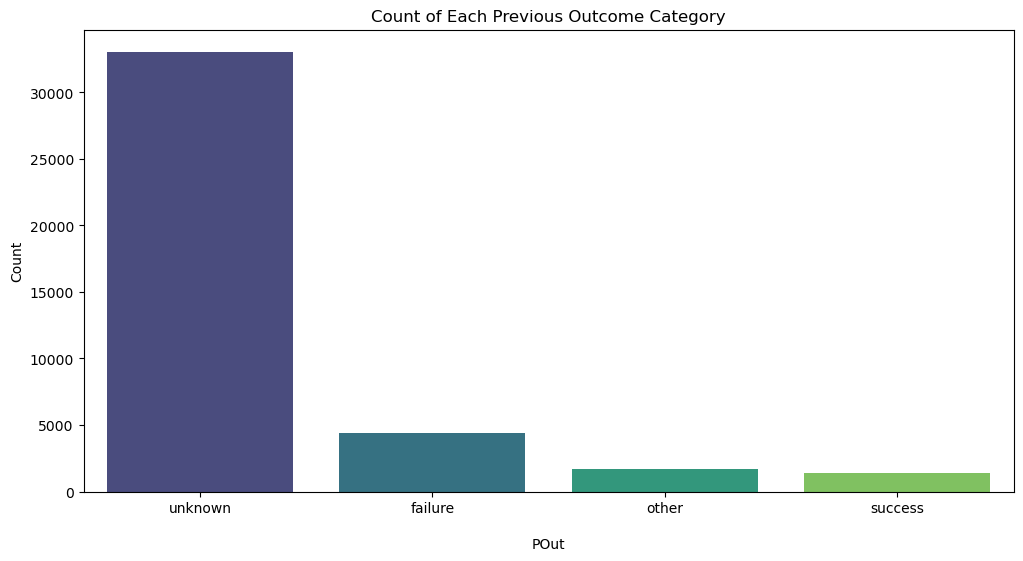

In [46]:
# Define counts
pout_counts = train_df['poutcome'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=pout_counts.index, y=pout_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Previous Outcome Category')
plt.xlabel('\nPOut')
plt.ylabel('Count')

# Show the plot
plt.show()

In [47]:
# Since most of the values are unknowns, we will drop it.
train_df.drop(columns=['poutcome'], inplace=True)

### Target Column **
Has the client subscribed a term deposit?

The dependent variable is the subscription status to a term deposit
indicating whether a customer subscribed (1)or not(0)following the bank's marketing campaign.

In [48]:
train_df['y'].value_counts()

y
no     35738
yes     4797
Name: count, dtype: int64

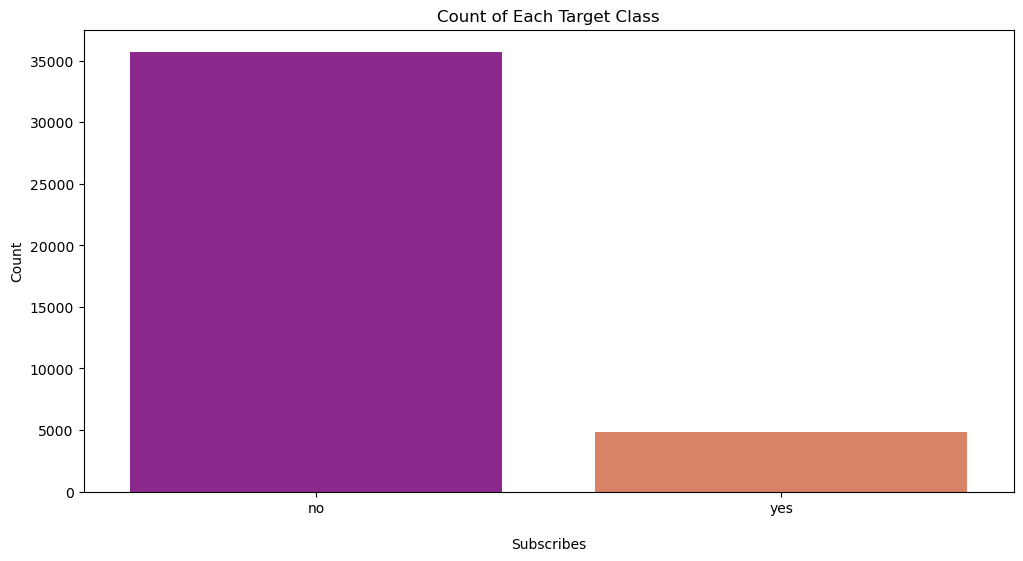

In [49]:
# Define counts
target_counts = train_df['y'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=target_counts.index, y=target_counts.values, palette='plasma')

# Add labels and title
plt.title('Count of Each Target Class')
plt.xlabel('\nSubscribes')
plt.ylabel('Count')

# Show the plot
plt.show()

## Label Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder

In [51]:
train_df = train_df.apply(LabelEncoder().fit_transform)
train_df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,40,4,1,3,2309,1,0,1,4,8,261,0,0,0
1,26,9,2,2,219,1,0,1,4,8,151,0,0,0
2,15,2,1,2,192,1,1,1,4,8,76,0,0,0
3,29,1,1,0,1694,1,0,1,4,8,92,0,0,0
5,17,4,1,3,421,1,0,1,4,8,139,0,0,0


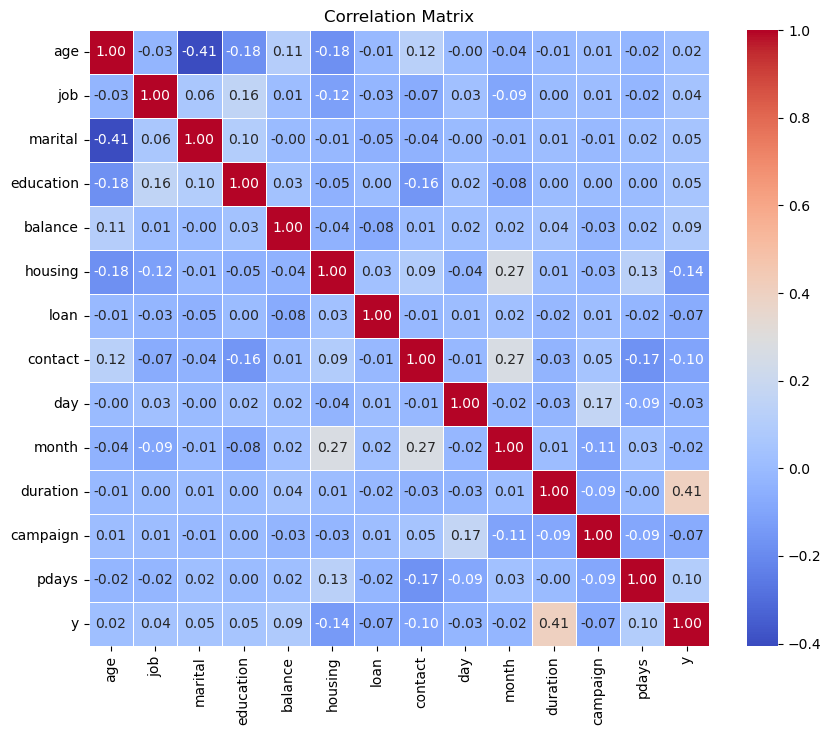

In [52]:
# Correlation matrix
correlation_matrix = train_df.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Test - Train Splitting

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = train_df.drop('y', axis=1)
y = train_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
train_df.sample(10)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
37104,37,4,0,3,2337,1,1,2,12,8,318,4,173,0
561,18,0,0,2,321,1,0,1,5,8,153,0,0,0
40071,11,4,1,3,395,0,0,0,3,6,787,0,0,1
15229,16,4,1,3,308,0,1,2,16,5,171,2,0,0
23083,17,4,1,3,421,0,0,0,25,1,130,5,0,0
31802,9,9,2,3,4212,0,0,0,7,0,114,0,0,1
1459,31,1,2,1,1354,1,0,1,7,8,72,0,0,0
16572,38,9,1,2,772,1,0,0,23,5,114,3,0,0
16186,14,9,1,2,4285,1,0,0,21,5,314,1,0,0
17655,14,0,2,3,328,0,1,0,28,5,57,3,0,0


In [56]:
print("X_train columns:", X_train.columns)

X_train columns: Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays'],
      dtype='object')


# MACHINE LEARNING ALGORITHMS

## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [58]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
# Apply PCA (2 principal components)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [60]:
# Train the Logistic Regression model without PCA
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
accuracy_before_pca = accuracy_score(y_test, y_pred)

In [61]:
# Train the Logistic Regression model with PCA
lr_pca = LogisticRegression(solver='liblinear', random_state=0)
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)
accuracy_after_pca = accuracy_score(y_test, y_pred_pca)

In [62]:
# Print results
print("Accuracy before PCA:", accuracy_before_pca)
print("Accuracy after PCA:", accuracy_after_pca)
print("Effect of PCA on accuracy:", accuracy_after_pca - accuracy_before_pca)

Accuracy before PCA: 0.8872579252497841
Accuracy after PCA: 0.8817071666461083
Effect of PCA on accuracy: -0.0055507586036758205


- The slight drop in accuracy after applying PCA is likely due to the reduction in feature dimensions, which can result in some loss of valuable information that was initially available in the original features. Although PCA reduces noise and redundancy, it may not capture all the nuances needed for accurate classification in this specific dataset, leading to a minor decrease in predictive performance.

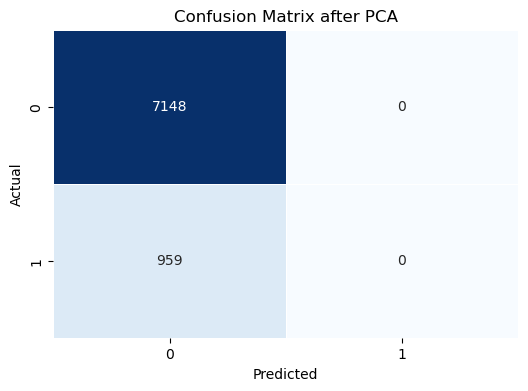

In [63]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_pca)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix after PCA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- Applying PCA reduced the model's ability to identify the positive class, causing it to misclassify all positive samples as negative, even though it continued to identify the negative class accurately.

In [64]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7148
           1       0.57      0.20      0.30       959

    accuracy                           0.89      8107
   macro avg       0.73      0.59      0.62      8107
weighted avg       0.86      0.89      0.86      8107



In [65]:
# Classification Report after PCA
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7148
           1       0.00      0.00      0.00       959

    accuracy                           0.88      8107
   macro avg       0.44      0.50      0.47      8107
weighted avg       0.78      0.88      0.83      8107



/Users/ardaaltinors/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ardaaltinors/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ardaaltinors/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## DECISION TREE CLASSIFIER


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [67]:
# Apply PCA (3 principal components)
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [68]:
# Train the Decision Tree model without PCA
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
accuracy_before_pca = accuracy_score(y_test, y_pred)

In [69]:
# Train the Decision Tree model with PCA
clf_pca = DecisionTreeClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
accuracy_after_pca = accuracy_score(y_test, y_pred_pca)

In [70]:
# Print results
print("Accuracy before PCA:", accuracy_before_pca)
print("Accuracy after PCA:", accuracy_after_pca)
print("Explained Variance Ratios:", pca.explained_variance_ratio_)

Accuracy before PCA: 0.8688787467620575
Accuracy after PCA: 0.8131244603429135
Explained Variance Ratios: [0.12547589 0.11738126 0.09925953]


In [71]:
# Predict on the original test set (without PCA)
y_pred_original = clf.predict(X_test_scaled)

# Predict on the test set with PCA
y_pred_pca = clf_pca.predict(X_test_pca)

# Confusion matrix for the original model (without PCA)
conf_matrix_original = confusion_matrix(y_test, y_pred_original)
disp_original = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_original)

# Confusion matrix for the PCA-transformed model
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
disp_pca = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_pca)

<Figure size 600x400 with 0 Axes>

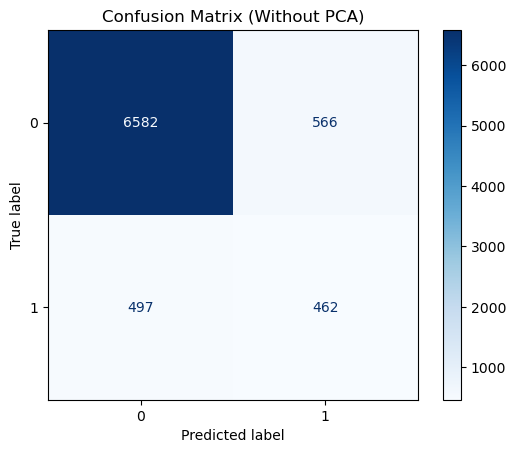

In [72]:
# Plot the confusion matrix without PCA
plt.figure(figsize=(6, 4))
disp_original.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Without PCA)")
plt.show()


<Figure size 600x400 with 0 Axes>

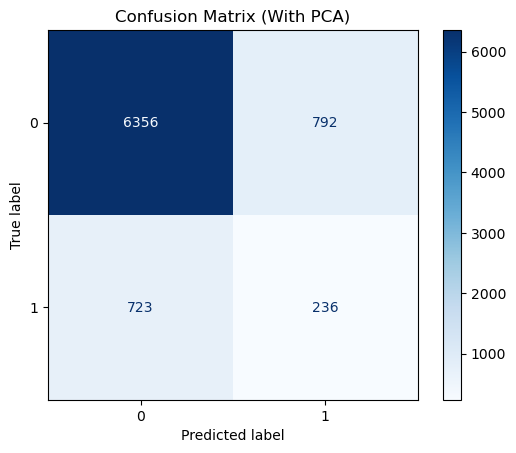

In [73]:
# Plot the confusion matrix with PCA
plt.figure(figsize=(6, 4))
disp_pca.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (With PCA)")
plt.show()

In [74]:
#TODO: Explanation 

# CONCLUSION

Logistic Regression achieves similar and consistent accuracies on both training (88.82%) and test (88.52%) datasets, slightly underperforming compared to the K-Neighbors Classifier's higher training accuracy.

The Decision Tree model shows a test accuracy of 89.60%, outperforming the Logistic Regression model.

Using only two features, the Decision Tree's accuracy drops to 82.70%, indicating a decrease in performance compared to the full-feature model with a higher test accuracy of 89.60%.

---

---

## Understanding the Duration


In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder

### Polynomial Regression

In [76]:
# Loading data
train_df = pd.read_csv("data/bank-data.csv", sep=';')

# Selecting features and target
X = train_df[['contact', 'month', 'day', 'campaign', 'age', 'job', 'balance', 'housing']]
y = train_df['duration']

# Encoding categorical variables
categorical_features = ['contact', 'month', 'job', 'housing']
numeric_features = ['day', 'campaign', 'age', 'balance']

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

In [77]:
# Apply PCA to numeric features
pca = PCA(n_components=3)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('pca', pca, numeric_features)  # Apply PCA to numeric features
    ])


In [78]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
# Define regression model
model = LinearRegression()


In [80]:
# Train regression model without PCA
preprocessor_without_pca = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
pipeline_without_pca = Pipeline(steps=[('preprocessor', preprocessor_without_pca), ('regressor', model)])
pipeline_without_pca.fit(X_train, y_train)
y_pred_train_without_pca = pipeline_without_pca.predict(X_train)
y_pred_test_without_pca = pipeline_without_pca.predict(X_test)
mse_train_without_pca = mean_squared_error(y_train, y_pred_train_without_pca)
mse_test_without_pca = mean_squared_error(y_test, y_pred_test_without_pca)

# Train regression model with PCA
pipeline_with_pca = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
pipeline_with_pca.fit(X_train, y_train)
y_pred_train_with_pca = pipeline_with_pca.predict(X_train)
y_pred_test_with_pca = pipeline_with_pca.predict(X_test)
mse_train_with_pca = mean_squared_error(y_train, y_pred_train_with_pca)
mse_test_with_pca = mean_squared_error(y_test, y_pred_test_with_pca)

In [81]:
# Print results
print("MSE on test set without PCA:", mse_test_without_pca)
print("MSE on test set with PCA:", mse_test_with_pca)

MSE on test set without PCA: 67053.08424189045
MSE on test set with PCA: 67053.04337498211


### K-Nearest Neighbors (KNN)

In [95]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor

In [91]:
# Load the data
df = pd.read_csv('data/bank-data.csv', sep=';')

# Define categorical and numerical columns
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'housing', 'loan']
numerical_columns = ['age', 'balance', 'day', 'campaign', 'pdays']

# Fill missing values and scale numerical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # This is an example, adjust your strategy
    ('scaler', StandardScaler())
])


In [92]:
# One-hot encode categorical columns
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])


In [93]:
# Apply preprocessing pipeline to the data
X = df.drop('duration', axis=1)  # Drop target variable
y = df['duration']  # Target variable

# Preprocess the features
X_processed = preprocessor.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [96]:
# Apply TruncatedSVD as an alternative to PCA
svd = TruncatedSVD(n_components=5)  # Choose the number of components based on your requirements
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)


In [97]:
# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can experiment with the number of neighbors


In [98]:
# Train the model
knn_regressor.fit(X_train_svd, y_train)

# Predict the test set
y_pred = knn_regressor.predict(X_test_svd)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error after TruncatedSVD: {mse}')

Mean Squared Error after TruncatedSVD: 79960.74364259648
